In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'CDistance'

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] <= 12)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)
tragitti = tragitti[post_lock_cond]

def clean(df):
    distance_cond = df[distance_param] > 0
    moovit_cond = df['Public'] > 12
    public_cond = df['Public'] > 0
    bike_cond = df['Bike'] > 0
    foot_cond = df['Foot'] > 0
    car_cond = df['Car'] > 0
    car2go_cond = df['Car2Go'] > 0
    enjoy_cond = df['Enjoy'] > 0
    coherence_cond = (df['Car'] <= df['Car2Go']) & (df['Car'] <= df['Enjoy'])
    cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond
    return cleaned

In [2]:
tragitti = tragitti[clean(tragitti)]

tragitti = tragitti[tragitti[distance_param] >= 2.]
bike_batte_car = tragitti[tragitti['Bike'] <= tragitti['Car']][[distance_param, 'Month', 'Day', 'Hour', 'Minute', 'Public', 'Car']]
len(bike_batte_car)

340

In [3]:
resume_on_distance = pd.crosstab(
    index=pd.cut(bike_batte_car[distance_param], bins=[2., 5., 7., 10.]),
    columns='Abs. freq.')

resume_on_distance.insert(1, '% sul tot.', (resume_on_distance['Abs. freq.'] / len(tragitti)).apply(lambda p: np.round(p, 3) * 100))
resume_on_distance

col_0,Abs. freq.,% sul tot.
CDistance,,
"(2.0, 5.0]",221,0.4
"(5.0, 7.0]",104,0.2
"(7.0, 10.0]",13,0.0


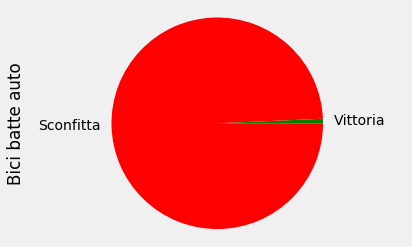

In [4]:
resume = pd.DataFrame(
    [len(bike_batte_car), len(tragitti) - len(bike_batte_car)],
    index=['Vittoria', 'Sconfitta'], columns=['Bici batte auto'])
resume.plot.pie('Bici batte auto', colors=['green', 'red'], legend=False)
plt.axis('equal')
plt.show()

In [5]:
resume.insert(1, "%", (resume['Bici batte auto'] / len(tragitti)).apply(lambda p: np.round(p, 3) * 100))
resume

,Bici batte auto,%
Vittoria,340,0.7
Sconfitta,49220,99.3
